### 作业1：

<div align="center">
	<img src="作业1.jpg" width="40%">
</div>

In [1]:
# (1)计算统计量
index = c(66,75,78,80,81,81,82,83,83,83,83,
          84,85,85,86,86,86,86,87,87,88,88,
          88,88,88,89,89,89,89,90,90,91,91,
          91,91,92,93,93,96,96,96,97,99,100,
          101,102,103,103,104,104,104,105,106,109,109,
          110,110,110,111,113,115,116,117,118,155,192)

summary(index)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  66.00   86.00   91.00   96.45  104.00  192.00 

In [4]:
library(prettyR)
Mode(index)

[1] "88"

因此，该数据的平均数是96.45，中位数是91，众数是88

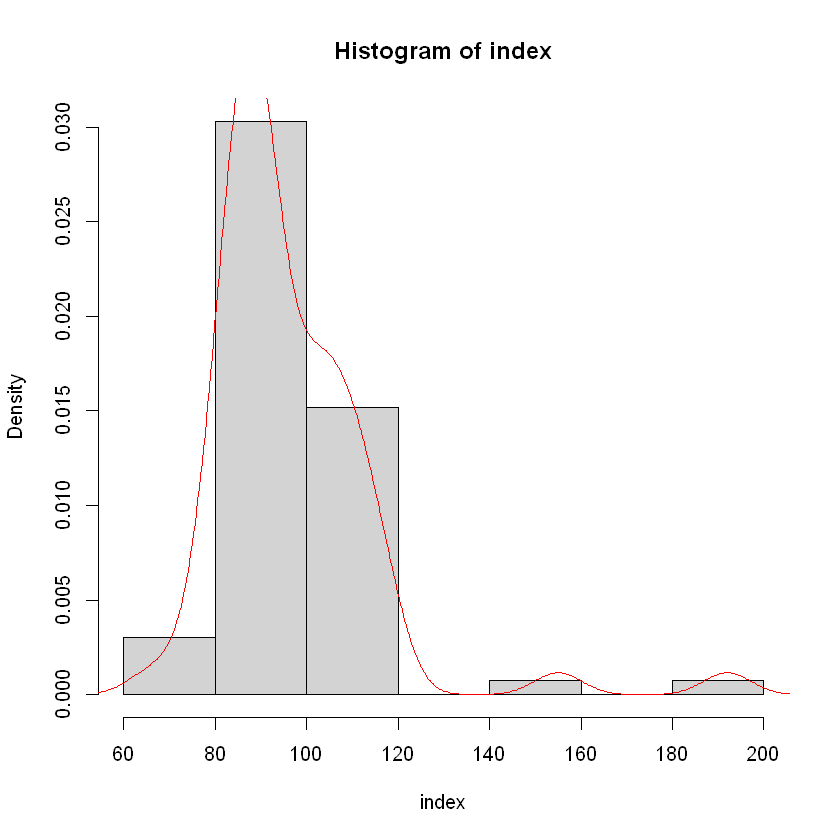

In [7]:
# (2)正态分布检验

# 直方图
hist(index, freq = F) #概率密度直方图
lines(density(index), col='red') # 随机数的密度曲线

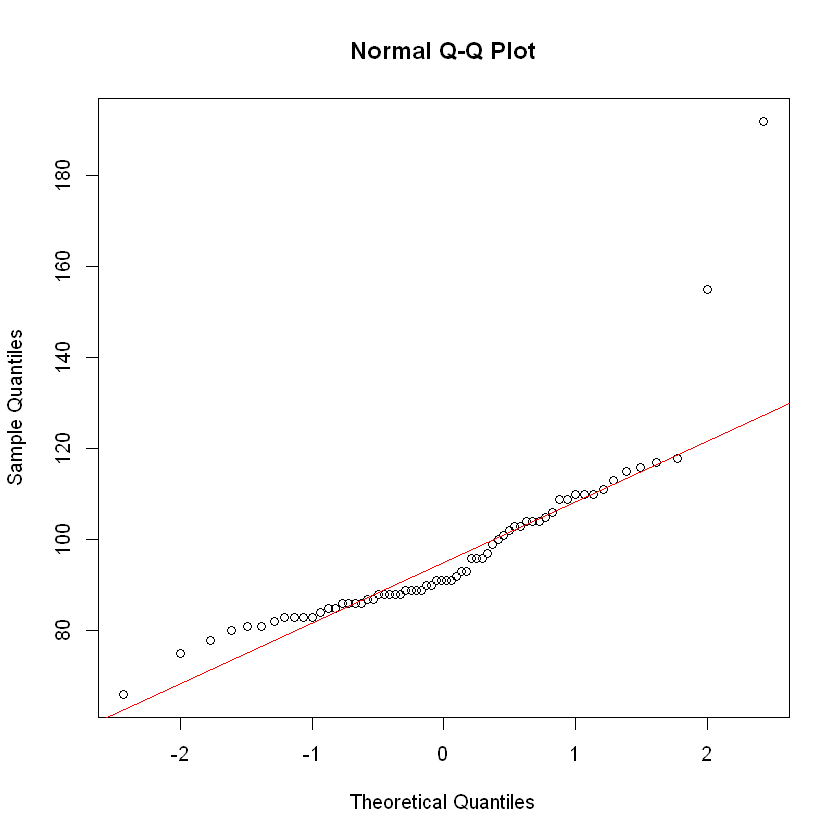

In [10]:
# QQ图
qqnorm(index)
qqline(index, col = "red")

summary statistics
------
min:  66   max:  192 
median:  91 
mean:  96.45455 
estimated sd:  18.09393 
estimated skewness:  2.790355 
estimated kurtosis:  15.24562 

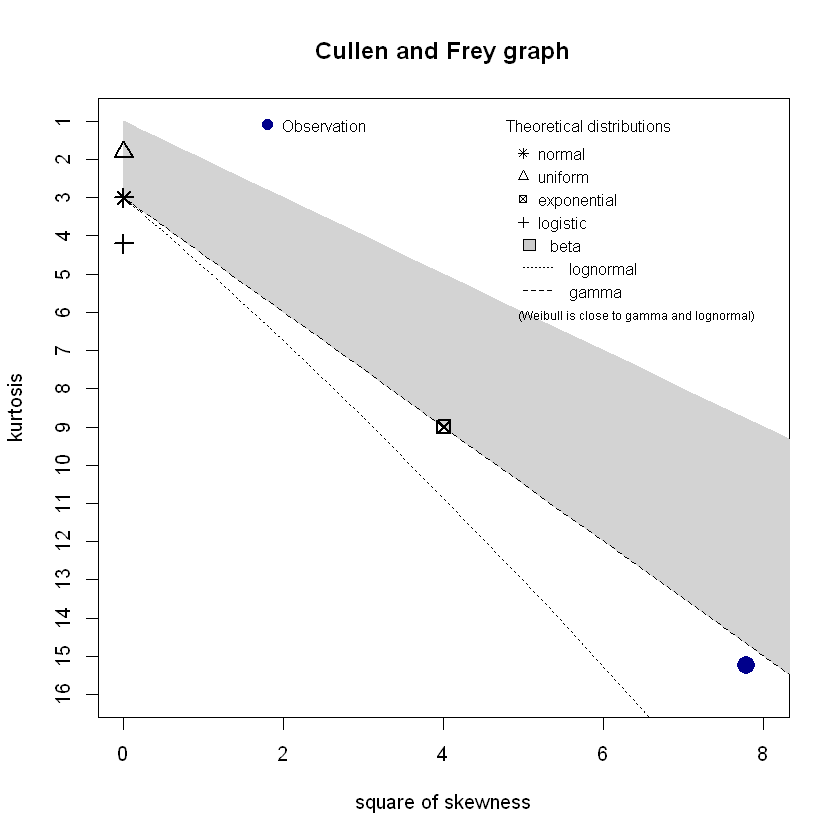

In [12]:
# 计算偏度峰度
library(fitdistrplus)
descdist(index)

可以看到，显然这个数据不服从正态分布，更接近对数正态分布

In [2]:
# 参数方法和符号检验法在判断北京水平(99) （该水平指中位数吗？）

# 符号检验法
sign.test = function(x,p,M0){ #x为数据，p为分位数，M0为待检验的的数
    s1 = sum(x<M0)
    s2 = sum(x>M0)
    n = s1+s2
    p1 = pbinom(s1,n,p)
    p2 = 1-pbinom(s1-1,n,p)

    if (p1>p2) m1 = "H0: M>=M0"
    else m1 = "H0: M<=M0"

    p.value = min(p1,p2)
    p.value2 = 2*p.value
    list(c("s+" = s2,"s-" = s1,"n'" = n),c("原假设" = m1,"单边p值" = p.value,"双边p值" = p.value2))
}

sign.test(index,0.5,99) 

[[1]]
s+ s- n' 
23 42 65 

[[2]]
              原假设              单边p值              双边p值 
         "H0: M>=M0" "0.0124059872857761" "0.0248119745715523"

可知，s−=23，s+=42，n’=65，而单边检验的p 值=0.0124059872857761<0.05。因此，在α=0.05时，拒绝原假设，认为中位数大于99，即北京在中位数水平之下。

In [23]:
# 参数方法（检验均值）
t.test(index, alternative = "greater", mu=99) # 单样本T检验，右侧检验，即认为99大于均值水平


	One Sample t-test

data:  index
t = -1.1429, df = 65, p-value = 0.8714
alternative hypothesis: true mean is greater than 99
95 percent confidence interval:
 92.73815      Inf
sample estimates:
mean of x 
 96.45455 


可知，p值大于0.05，在α=0.05时，不能拒绝原假设，认为均值小于99，即北京在平均水平之上。

### 作业2：

<div align="center">
	<img src="作业2.jpg" width="40%">
</div>

In [26]:
# 配对样本检验

x = c(86,90,91,101,93,85,92,115,72,75,120,106,104) # 第一胎
y = c(82,94,96,106,92,90,98,120,74,80,130,110,109) # 第二胎

# 参数方法：配对样本t检验
t.test(x, y, alternative = "less", paired = TRUE) # H0:x-y>=0


	Paired t-test

data:  x and y
t = -4.1572, df = 12, p-value = 0.0006647
alternative hypothesis: true difference in means is less than 0
95 percent confidence interval:
      -Inf -2.241167
sample estimates:
mean of the differences 
              -3.923077 


可知，p值小于0.05，在α=0.05时，拒绝原假设，认为两个样本的均值有显著差异，且第一胎水平大于第二胎水平，即同意智商随着出生顺序而升高。

In [27]:
# 非参数检验：配对样本符号检验

sign.test(x-y,0.5,0) 

[[1]]
s+ s- n' 
 2 11 13 

[[2]]
         原假设         单边p值         双边p值 
    "H0: M>=M0" "0.01123046875"  "0.0224609375"

可知，原假设是x-y的中位数>=0,即过半数据第一胎智商高于第二胎，而单边检验的p 值=0.01123046875<0.05。因此，在α=0.05时，拒绝原假设，认为x-y的中位数并不大于0，即认为第一胎水平小于第二胎水平，不同意智商随着出生顺序而升高的结论。